In [1]:
import os
import miditoolkit
import copy
import glob
from tqdm import tqdm
import shutil

In [2]:
midi_folder = glob.glob("./LMD_matched_sample/*/*/*/*")
midi_path = [glob.glob(x+'/*.mid')[0] for x in midi_folder]

# EDA

In [ ]:
from collections import Counter
inst_stat = list()
for path in tqdm(midi_path):
    try:
        midi_obj = miditoolkit.midi.parser.MidiFile(path)
        inst = midi_obj.instruments
        inst_list = [x.program for x in inst]
        for x in set(inst_list):
            inst_stat.append(x)
    except:
        continue
c = Counter(inst_stat)
dict(sorted(c.items(), key=lambda item: -item[1])) 

In [23]:
statdict = {0: 2053,
 33: 847,
 25: 811,
 48: 804,
 27: 578,
 52: 530,
 35: 518,
 49: 489,
 29: 457,
 30: 439,
 1: 381,
 24: 381,
 50: 375,
 26: 372,
 32: 365,
 73: 356,
 28: 329,
 53: 326,
 4: 289,
 81: 278,
 65: 253,
 119: 240,
 61: 232,
 38: 223,
 5: 214,
 18: 213,
 16: 194,
 89: 194,
 62: 188,
 54: 182,
 56: 179,
 11: 178,
 80: 166,
 66: 164,
 39: 158,
 40: 157,
 87: 156,
 34: 152,
 90: 148,
 60: 147,
 88: 147,
 2: 140,
 17: 136,
 57: 135,
 82: 135,
 71: 127,
 75: 123,
 68: 122,
 46: 113,
 51: 112,
 100: 107,
 95: 106,
 8: 104,
 91: 99,
 47: 99,
 45: 94,
 22: 85,
 6: 82,
 7: 79,
 99: 78,
 63: 75,
 122: 74,
 127: 71,
 36: 70,
 94: 69,
 9: 68,
 118: 68,
 44: 67,
 3: 66,
 72: 62,
 10: 62,
 84: 58,
 42: 58,
 67: 57,
 55: 56,
 79: 56,
 120: 56,
 21: 55,
 12: 54,
 70: 54,
 31: 52,
 64: 51,
 85: 50,
 96: 47,
 78: 45,
 14: 44,
 74: 43,
 93: 41,
 104: 40,
 58: 39,
 19: 35,
 37: 35,
 124: 35,
 41: 35,
 43: 33,
 92: 33,
 103: 32,
 77: 32,
 102: 32,
 105: 31,
 116: 31,
 98: 31,
 125: 29,
 126: 29,
 69: 27,
 115: 26,
 117: 24,
 110: 24,
 83: 23,
 23: 22,
 106: 22,
 13: 22,
 114: 22,
 101: 21,
 108: 21,
 76: 21,
 59: 16,
 123: 16,
 107: 16,
 20: 16,
 112: 12,
 97: 12,
 86: 12,
 15: 11,
 121: 10,
 113: 9,
 109: 6,
 111: 3}

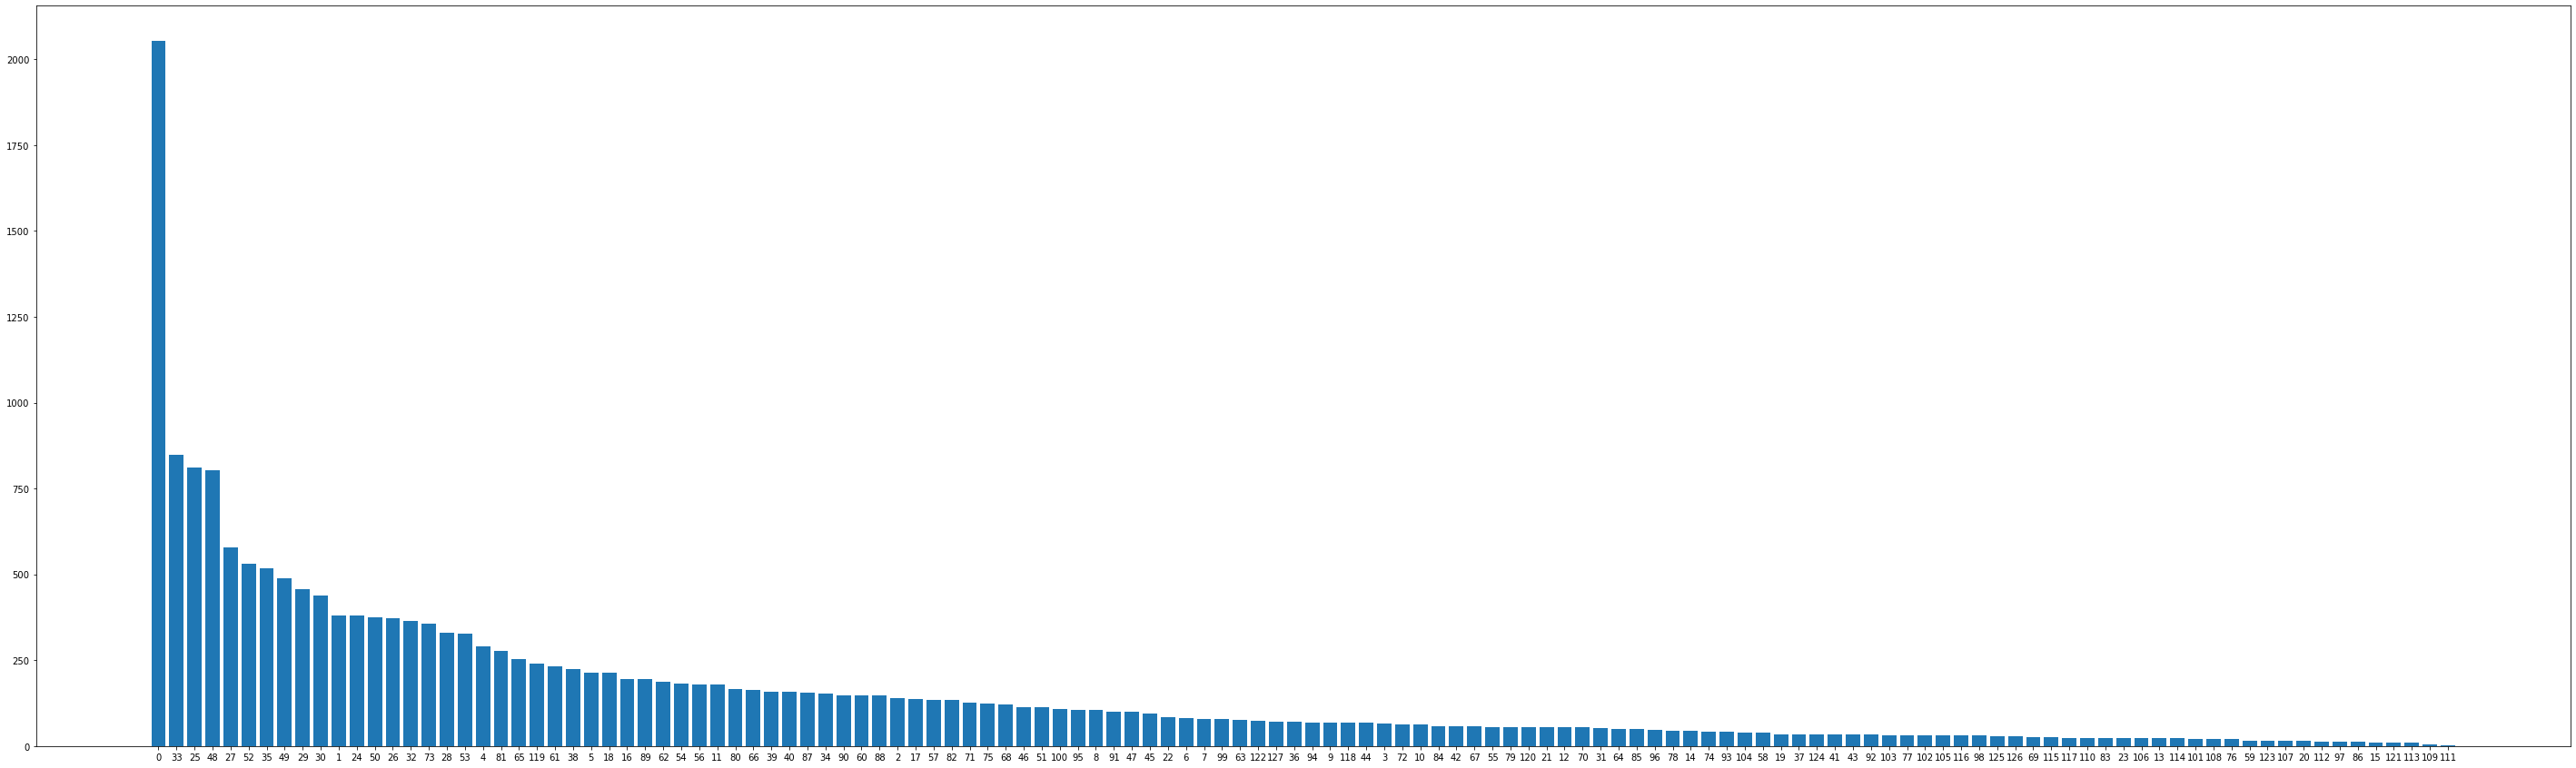

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (50,15))
plt.bar(range(len(statdict)), list(statdict.values()), align='center')
plt.xticks(range(len(statdict)), list(statdict.keys()))
plt.show()

In [ ]:
sampled_midi = list()
counter=0
for path in tqdm(midi_path):
    try:
        midi_obj = miditoolkit.midi.parser.MidiFile(path)
        inst = midi_obj.instruments
        inst_list = [x.program for x in inst]
        if set([0,25,33]).issubset(inst_list):
            counter+=1
            sampled_midi.append(path)
    except:
        continue
    if len(sampled_midi)==160:
        break

In [5]:
sample_path

'./Augmentation\\TRAADKW128E079503A\\ori.mid'

In [ ]:
for path in new_midi_file:
    folder_id = path.split('\\')[1]
    folder_name = "./Augmentation2/"+folder_id
    os.mkdir(folder_name)
    shutil.copyfile(path,folder_name+"/ori.mid")

In [9]:
new_midi_file = glob.glob('./Augmentation2/*/ori.mid')
print(len(new_midi_file))

160


In [10]:
sample_path = new_midi_file[0]
dir(miditoolkit.midi.parser.MidiFile(sample_path).instruments[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'control_changes',
 'is_drum',
 'name',
 'notes',
 'pedals',
 'pitch_bends',
 'program',
 'remove_invalid_notes']

In [15]:
# aggressive positive addition
for path in tqdm(new_midi_file):
    midi_obj =  miditoolkit.midi.parser.MidiFile(path)
    instruments = midi_obj.instruments
    for i in range(len(instruments)):
        inst = instruments[i]
        if inst.program==0:
            aug_inst1 = copy.deepcopy(inst)
            aug_inst2 = copy.deepcopy(inst)
            aug_inst1.program==4
            aug_inst2.program==5
            aug_inst1.notes = inst.notes[:int(len(inst.notes)/2)]
            aug_inst2.notes = inst.notes[int(len(inst.notes)/2):]
            instruments.append(aug_inst1)
            instruments.append(aug_inst2)
    midi_obj.dump(path.replace("ori.mid","aug_add_agg_pos.mid"))

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [05:57<00:00,  2.23s/it]


In [22]:
#aggressive negative addition
for path in tqdm(new_midi_file):
    midi_obj =  miditoolkit.midi.parser.MidiFile(path)
    instruments = midi_obj.instruments
    for i in range(len(instruments)):
        inst = instruments[i]
        if inst.program==0:
            aug_inst1 = copy.deepcopy(inst)
            aug_inst2 = copy.deepcopy(inst)
            aug_inst1.program==random.choice([x+80 for x in range(32)])
            aug_inst2.program==random.choice([x+80 for x in range(32)])
            aug_inst1.notes = inst.notes[:int(len(inst.notes)/2)]
            aug_inst2.notes = inst.notes[int(len(inst.notes)/2):]
            instruments.append(aug_inst1)
            instruments.append(aug_inst2)
    midi_obj.dump(path.replace("ori.mid","aug_add_agg_neg.mid"))

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [01:27<00:00,  1.82it/s]


In [37]:
# positive addition
for path in new_midi_file:
    aug = False
    midi_obj =  miditoolkit.midi.parser.MidiFile(path)
    instruments = midi_obj.instruments
    for inst in instruments:
        if inst.program==0:
            if not aug:
                aug_inst = copy.deepcopy(inst)
                aug_inst.program = 1
                instruments.append(aug_inst)
                aug = True
    midi_obj.dump(path.replace("ori.mid","aug_add_pos.mid"))
    

In [57]:
# negative addition
import random
for path in tqdm(new_midi_file):
    aug = False
    midi_obj =  miditoolkit.midi.parser.MidiFile(path)
    instruments = midi_obj.instruments
    for inst in instruments:
        if inst.program==0:
            if not aug:
                aug_inst = copy.deepcopy(inst)
                aug_inst.program = random.choice([x+120 for x in range(8)])
                instruments.append(aug_inst)
                aug = True
    midi_obj.dump(path.replace("ori.mid","aug_add_neg.mid"))
    

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [05:20<00:00,  2.00s/it]


In [18]:
import random
for path in tqdm(new_midi_file):
    midi_obj =  miditoolkit.midi.parser.MidiFile(path)
    instruments = midi_obj.instruments
    counter = 0
    record = 0
    p = random.random()
    for i in range(len(instruments)):
        inst = instruments[i]
        if p>0.5:
            if inst.program==25:
                copy_inst = copy.deepcopy(inst)
                copy_inst.program = random.choice([24,26,27])
                instruments.append(copy_inst)
            elif inst.program==33:
                inst.program = random.choice([32,34,35])
        else:
            if inst.program==33:
                copy_inst = copy.deepcopy(inst)
                copy_inst.program = random.choice([32,34,35])
                instruments.append(copy_inst)
            elif inst.program==25:
                inst.program =  random.choice([24,26,27])
        midi_obj.dump(path.replace("ori.mid","aug_change_agg_pos.mid"))

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [19:59<00:00,  7.49s/it]


In [19]:
for path in tqdm(new_midi_file):
    midi_obj =  miditoolkit.midi.parser.MidiFile(path)
    instruments = midi_obj.instruments
    inst0 = instruments[0]
    inst1 = instruments[1]
    copy_inst = copy.deepcopy(inst0)
    instruments.append(copy_inst)
    inst0.program = random.choice([x+120 for x in range(8)])
    inst1.program = random.choice([x+120 for x in range(8)])
    midi_obj.dump(path.replace("ori.mid","aug_change_agg_neg.mid"))

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [01:17<00:00,  2.07it/s]


In [21]:
for path in tqdm(new_midi_file):
    midi_obj =  miditoolkit.midi.parser.MidiFile(path)
    instruments = midi_obj.instruments
    for x in instruments:
        x.program = random.choice([x for x in range(120)])
    midi_obj.dump(path.replace("ori.mid","aug_change_shuf_neg.mid"))

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [01:07<00:00,  2.38it/s]


In [59]:
# positive(plausible) mutation
for path in tqdm(new_midi_file):
    midi_obj =  miditoolkit.midi.parser.MidiFile(path)
    instruments = midi_obj.instruments
    counter = 0
    record = 0
    p = random.random()
    if p>0.5:
        for x in instruments:
            counter+=1
            if x.program==25:
                record = counter
        inst = instruments[record-1]
        inst.program = random.choice([24,26,27])
    else:
        for x in instruments:
            counter+=1
            if x.program==33:
                record = counter
        inst = instruments[record-1]
        inst.program = random.choice([32,34,35])
    midi_obj.dump(path.replace("ori.mid","aug_change_pos.mid"))
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [04:39<00:00,  1.75s/it]


In [60]:
# negative(non_plausible) mutation
for path in tqdm(new_midi_file):
    midi_obj =  miditoolkit.midi.parser.MidiFile(path)
    instruments = midi_obj.instruments
    counter = 0
    record = 0
    p = random.random()
    if p>0.5:
        for x in instruments:
            counter+=1
            if x.program==25:
                record = counter
        inst = instruments[record-1]
        inst.program = random.choice([x+120 for x in range(8)])
    else:
        for x in instruments:
            counter+=1
            if x.program==33:
                record = counter
        inst = instruments[record-1]
        inst.program = random.choice([x+120 for x in range(8)])
    midi_obj.dump(path.replace("ori.mid","aug_change_neg.mid"))
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [04:38<00:00,  1.74s/it]


In [4]:
import torch.nn.functional as F
import torch

In [10]:
result = [[ 0.89239357 ,-0.79676874],[ 0.98924045, -0.89240202],[ 1.04507516, -0.94883361],[ 1.0784067,  -0.99171799],[ 0.97471868, -0.8666005 ]]
result = torch.tensor(result)

In [11]:
result

tensor([[ 0.8924, -0.7968],
        [ 0.9892, -0.8924],
        [ 1.0451, -0.9488],
        [ 1.0784, -0.9917],
        [ 0.9747, -0.8666]])

In [13]:
for a in result:
    print(F.softmax(a))

tensor([0.8441, 0.1559])
tensor([0.8678, 0.1322])
tensor([0.8802, 0.1198])
tensor([0.8880, 0.1120])
tensor([0.8631, 0.1369])


C:\Users\brian\AppData\Local\Temp/ipykernel_12204/1235549191.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(a))
